# Evacuees over time

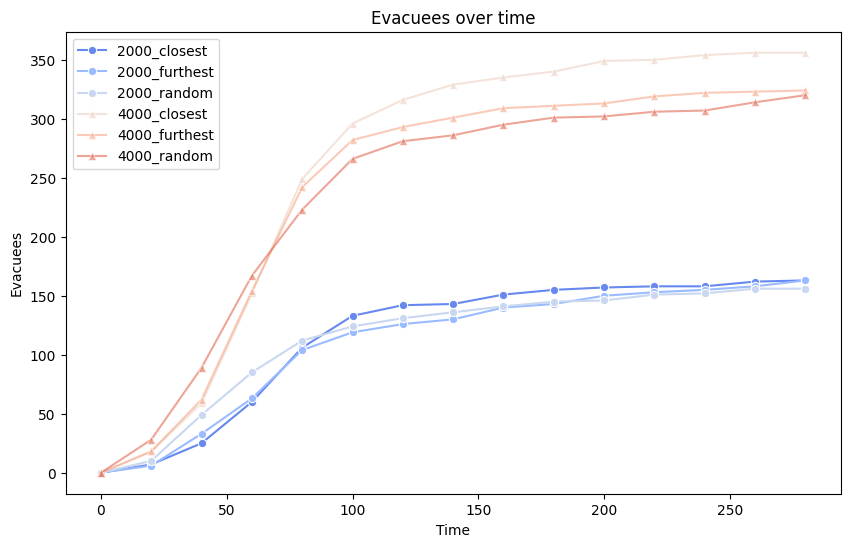

In [29]:
import pandas as pd
import numpy as np
from pathlib import Path

RESULT_PATH = Path('../results')

df_2000_closest = pd.read_csv(RESULT_PATH / 'evacuees_2000_closest.csv')
df_2000_furthest = pd.read_csv(RESULT_PATH / 'evacuees_2000_furthest.csv')
df_2000_random = pd.read_csv(RESULT_PATH / 'evacuees_2000_random.csv')

df_4000_closest = pd.read_csv(RESULT_PATH / 'evacuees_4000_closest.csv')
df_4000_furthest = pd.read_csv(RESULT_PATH / 'evacuees_4000_furthest.csv')
df_4000_random = pd.read_csv(RESULT_PATH / 'evacuees_4000_random.csv')

max_time = 300
df_2000_closest = df_2000_closest[df_2000_closest['cycle'] < max_time]
df_2000_furthest = df_2000_furthest[df_2000_furthest['cycle'] < max_time]
df_2000_random = df_2000_random[df_2000_random['cycle'] < max_time]
df_4000_closest = df_4000_closest[df_4000_closest['cycle'] < max_time]
df_4000_furthest = df_4000_furthest[df_4000_furthest['cycle'] < max_time]
df_4000_random = df_4000_random[df_4000_random['cycle'] < max_time]

df_2000_furthest.head()

# draw plot of 6 series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("coolwarm")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2000_closest, x='cycle', y='number_evacuted_people', label='2000_closest', marker='o')
sns.lineplot(data=df_2000_furthest, x='cycle', y='number_evacuted_people', label='2000_furthest', marker='o')
sns.lineplot(data=df_2000_random, x='cycle', y='number_evacuted_people', label='2000_random', marker='o')

sns.lineplot(data=df_4000_closest, x='cycle', y='number_evacuted_people', label='4000_closest', marker='^', alpha=0.6)
sns.lineplot(data=df_4000_furthest, x='cycle', y='number_evacuted_people', label='4000_furthest', marker='^', alpha=0.6)
sns.lineplot(data=df_4000_random, x='cycle', y='number_evacuted_people', label='4000_random', marker='^', alpha=0.6)
plt.title('Evacuees over time')
plt.xlabel('Time')
plt.ylabel('Evacuees')
plt.show()




# Most Effective Strategy

In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv('../results/batch.csv')

# find row with max number of evacuees
max_evacuees = df['number_evacuted_people'].max()
max_row = df[df['number_evacuted_people'] == max_evacuees]
print(f'Max evacuees: {max_row}')


# find row with max number of efficiency
efficiency = df['efficiency'].max()
max_row = df[df['efficiency'] == efficiency]
print(f'Max evacuees: {max_row}')


Max evacuees:     nb_of_people initial_inform_strategy  ...  total_time_in_roads  efficiency
11          4000                  random  ...           25555912.0    0.001834

[1 rows x 6 columns]
Max evacuees:     nb_of_people initial_inform_strategy  ...  total_time_in_roads  efficiency
24          1500                 closest  ...            4213146.0    0.001958

[1 rows x 6 columns]


In [39]:
df_120 = df[df['flooding_alert_time_minutes'] == 120]
df_120 = df_120[['initial_inform_strategy', 'nb_of_people', 'number_evacuted_people', 'total_time_in_roads', 'efficiency']]
df_120

,initial_inform_strategy,nb_of_people,number_evacuted_people,total_time_in_roads,efficiency
2,random,1500,142.4,9204840.0,0.001858
5,random,2000,180.8,12519134.0,0.001735
8,random,3000,287.2,19016348.0,0.001812
11,random,4000,390.6,25555912.0,0.001834
14,furthest,1500,138.6,9116900.0,0.001825
17,furthest,2000,186.4,12379352.0,0.001811
20,furthest,3000,291.8,18816798.0,0.001862
23,furthest,4000,370.4,25506842.0,0.001743
26,closest,1500,146.6,9048712.0,0.001945
29,closest,2000,195.2,12304554.0,0.001905
